In [71]:
import pandas as pd
import numpy as np    # For Mathematical calculations
import seaborn as sns # For data visualisation
import matplotlib.pyplot as plt # For plotting graphs
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [72]:
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')
train_original = train.copy()
test_original = test.copy()

In [73]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [75]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [76]:
train.shape, test.shape

((614, 13), (367, 12))

# Univariate Analysis

## Target Variable

In [77]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [78]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

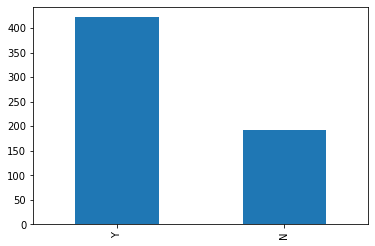

In [79]:
train['Loan_Status'].value_counts().plot.bar()

## Independent Categorical Variables

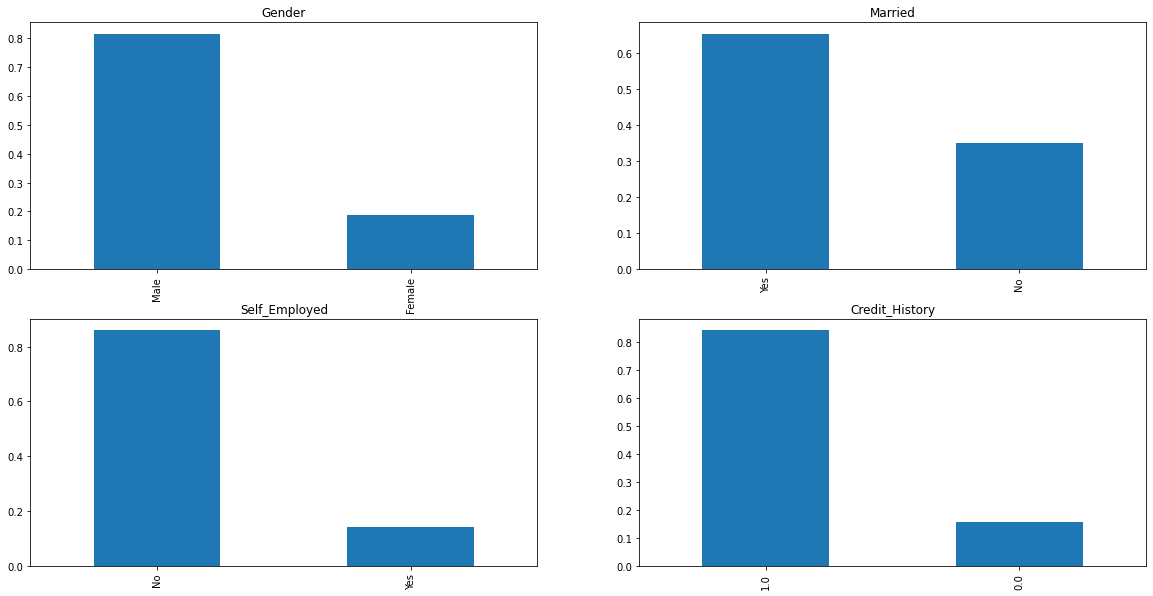

In [80]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

## Independent Ordinal Variable

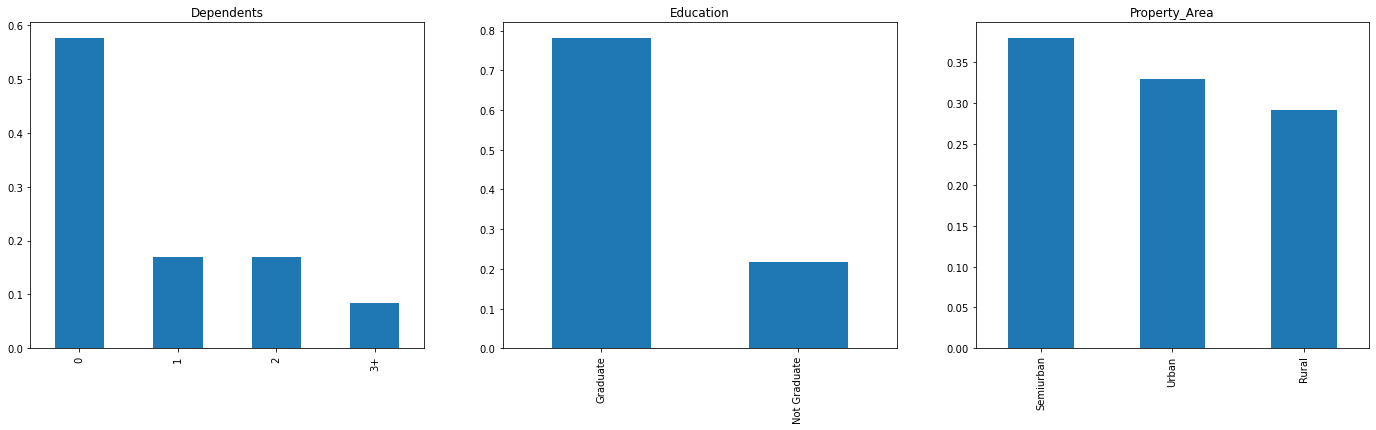

In [81]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

## Independent Numerical Variables

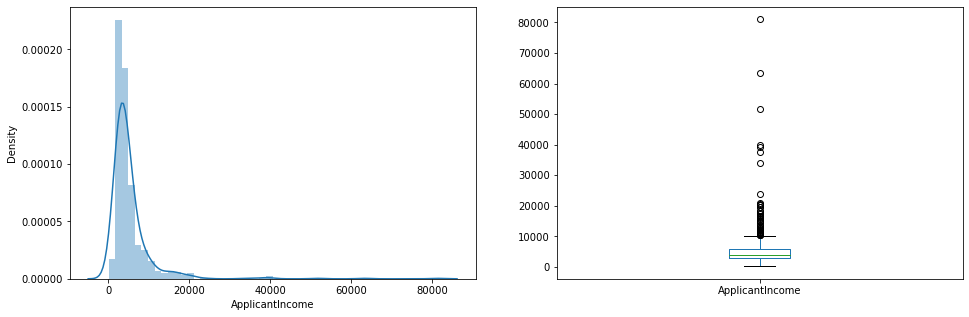

In [82]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

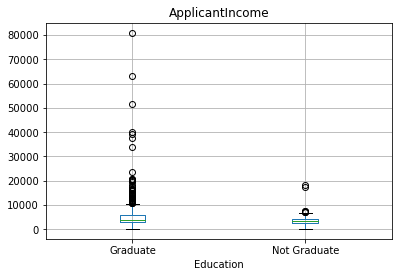

In [83]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

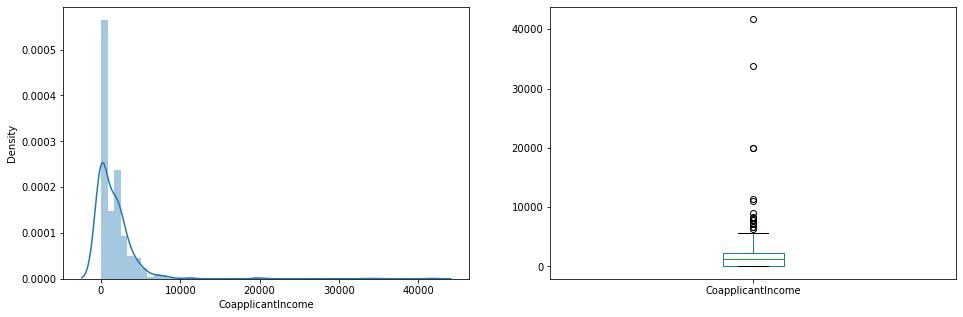

In [84]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

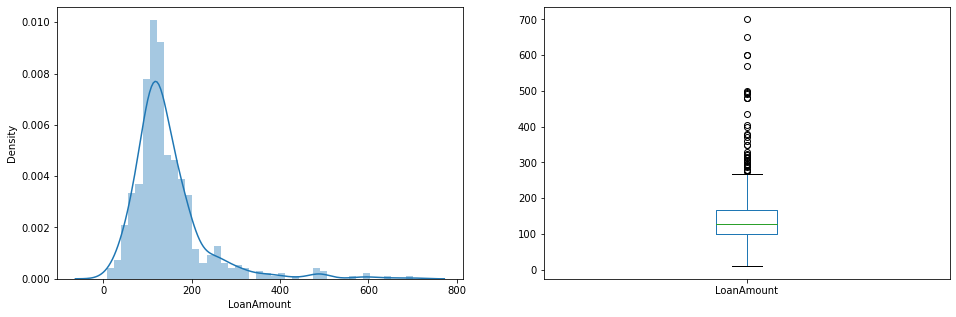

In [85]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['LoanAmount']);
plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

# Bivariate Analysis

## Categorical Independent Variable vs Target Variable

In [86]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [87]:
Gender.div(Gender.sum(1).astype(float),axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


In [88]:
Gender.sum(1)

Gender
Female    112
Male      489
dtype: int64

In [89]:
Gender.div(10,axis=0)

Loan_Status,N,Y
Gender,,
Female,3.7,7.5
Male,15.0,33.9


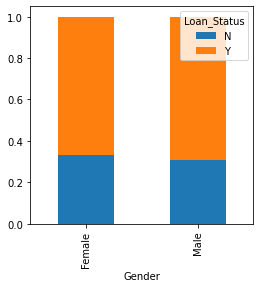

In [90]:
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [91]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

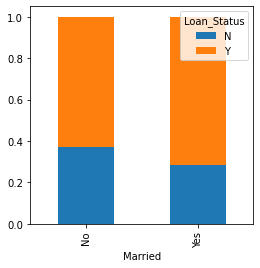

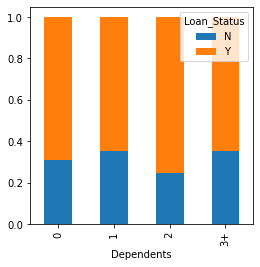

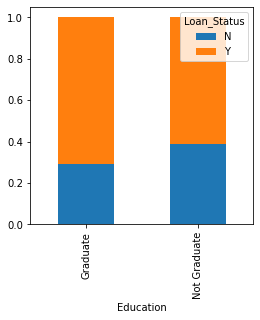

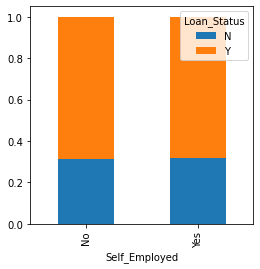

In [92]:
#plt.figure(1)
#plt.subplot(221)
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

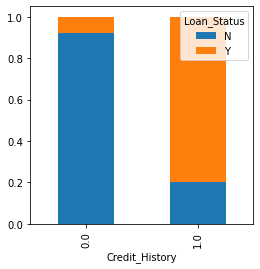

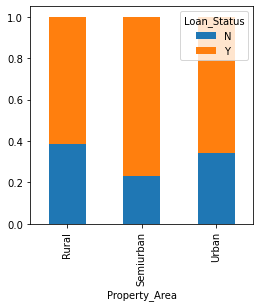

In [93]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

## Numerical Independent Variable vs Target Variable

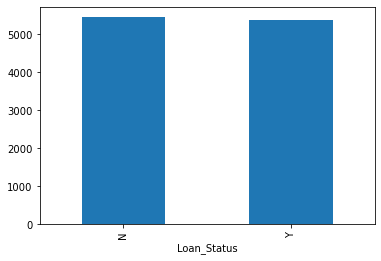

In [94]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

Here the y-axis represents the mean applicant income. We don't see any change in the mean income.So let's make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

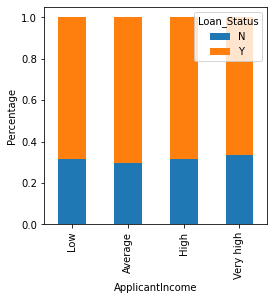

In [95]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very high']
train['Income_bin']= pd.cut(train['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.show()

It can be inferred that Applicant income does not affect the chances of loan approval which contracdicts our hypothesis in which we assumed that if the applicant income is high the changes of loan approval will also be high


We will analyze the coapplicant income and loan amount variablein similar manner.

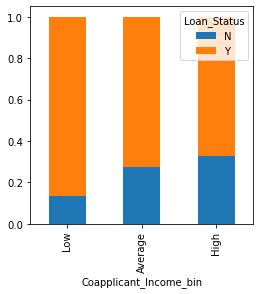

In [96]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

It shows that if coapplicant's income is less the chances of loan approval are high. But this does not makes sense. The possible reason behind this may be that most of the applicants don't have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant's and coapplicant's income to visualize the combined effect of income on loan approval.

Let us combine the Applicant and Coapplicant income and see the combined effect of Total income on the Loan_Status

In [97]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

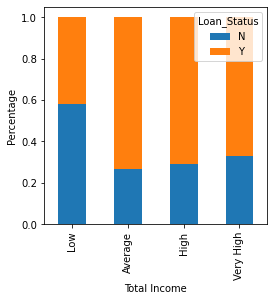

In [98]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin'] = pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin = pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Total Income')
plt.ylabel('Percentage')
plt.show()

We can see the proportion of loans getting approved for applicants having low Total Income is very less as compared to that of applicants with Average,High and Very High Income

Let's visualize the Loan Amount Variable

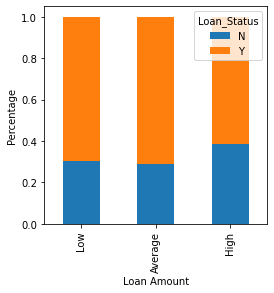

In [99]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.xlabel('Loan Amount')
plt.ylabel('Percentage')
plt.show()

It can be seen that the proportion of approved loan is higherfor Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less

Let's drop the bins which we created for the exploration part. We will change the 3+ in dependents variabvle to 3 to make it a numerical variable. We will also conver the target variable's categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logisic regression takes only numeric values as input.We will replace N with 0 and Y with 1

In [100]:
train = train.drop(['Income_bin','Coapplicant_Income_bin','LoanAmount_bin','Total_Income_bin','Total_Income'], axis=1)

In [101]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

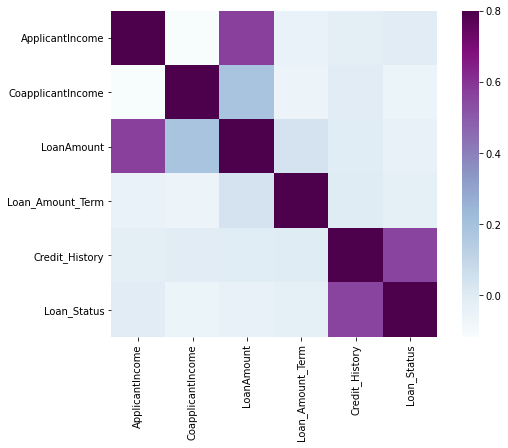

In [102]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap='BuPu');

# Missing Value Imputation

In [103]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are very less missing values in Gender,Married,Dependents,Credit_History and Self_Employed features so we can fill them using the mode of the features

In [104]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

Now let's try to find way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable

In [105]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [106]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [107]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [108]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let's fill all the missing values in the test dataset too with the same approach

In [109]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [110]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

# Outlier Treatment

Due to the outlier bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So we get a distribution similar to normal distribution.

Let's visualize the effect of log transformation. We will do the similar changes to the tes file simultaneously.

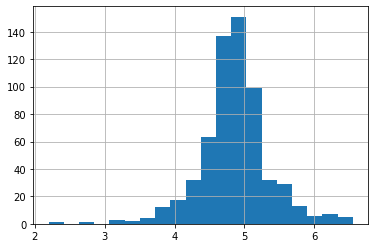

In [111]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's build a logistic regression model and make predictions for the test dataset.

# Model Building

Lets drop the Loan_ID variables as it do not have any effect on the loan status. We will do the same changes to the test dataset

In [112]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

We will use scikit-learn(sklearn) for making different models which is an open source library for Python. Is is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python

Sklearn requires the target variable in a separate dataset. So we will drop our target variable from the train dataset and save it in another dataset

In [113]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variables turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare.

In [114]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model

## Logistic Regression Model

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
from sklearn.metrics import accuracy_score

In [119]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

Let's predict the Loan_Status for validation set and calculate its accuracy.

In [120]:
pred_cv = model.predict(x_cv)

Lets us calculate how accurate our predictions are by calculating the accuracy

In [121]:
accuracy_score(y_cv,pred_cv)

0.8162162162162162

In [122]:
pred_test = model.predict(test)

In [123]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [124]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']

In [125]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Logistic.csv',index=False)

## StratifiedKFold Cross Validation

In [126]:
from sklearn.model_selection import StratifiedKFold

In [127]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i += 1

pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8373983739837398

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.7886178861788617

5 of kfold 5
accuracy_score 0.7950819672131147


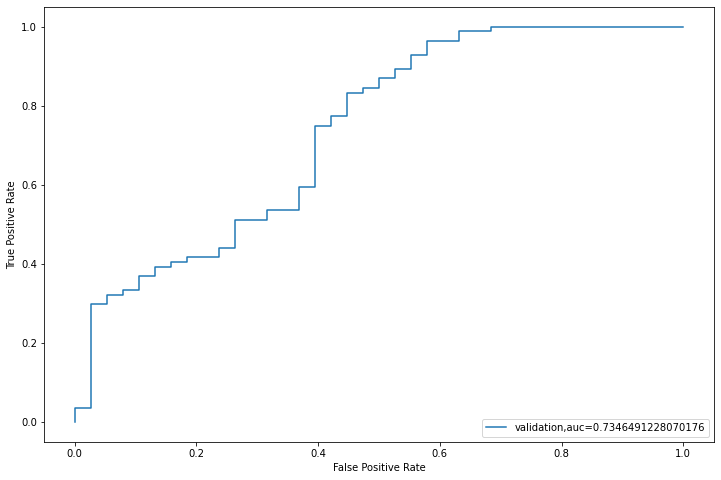

In [128]:
from sklearn import metrics
fpr,tpr, _ = metrics.roc_curve(yvl,pred)
auc = metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation,auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [129]:
submission['Loan_Status']=pred_test
submission['Loan_ID']=test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [131]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Kfold_Logistic.csv',index=False)

# Feature Engineering

Based on domain knowledge, we can come up with new features that might affect the target variable.
We will create the following three new features.

In [133]:
train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome'] + test['CoapplicantIncome']

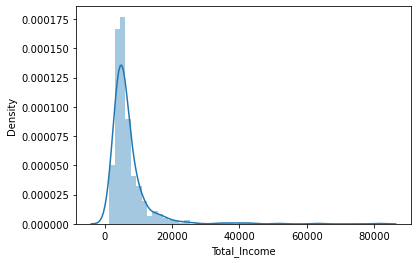

In [134]:
sns.distplot(train['Total_Income']);

We can see it shifted towards left,i.e. the distribution is right skewed. So let's take the log transformation to make the distribution normal.

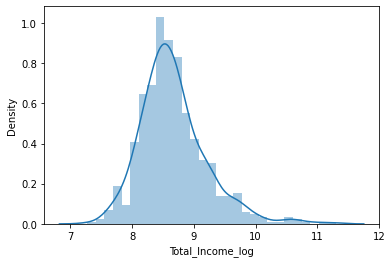

In [136]:
train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log']);
test['Total_Income_log'] = np.log(test['Total_Income'])

Now the distribution look much closer to normal and effect of extreme values has been significantly subsided. 
Let's create the EMI feature now.

In [137]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

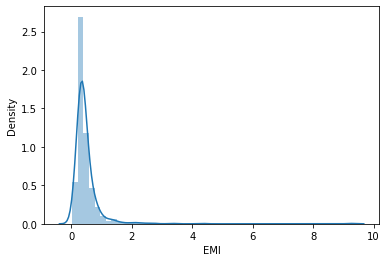

In [139]:
sns.distplot(train['EMI']);

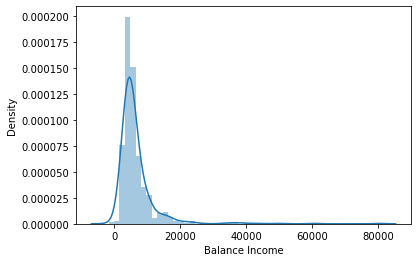

In [141]:
train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000) # Multiply with 1000 to make the units equal
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)
sns.distplot(train['Balance Income']);

Lets now drop the variables which we used to create the new features.

In [142]:
train = train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
test = test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)

In [143]:
train.columns

Index(['Credit_History', 'Loan_Status', 'LoanAmount_log', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI', 'Balance Income'],
      dtype='object')

In [145]:
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [150]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    #print(train_index,test_index)
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred = model.predict_proba(xvl)[:,1]


1 of Kfold 5
accuracy_score 0.7886178861788617

2 of Kfold 5
accuracy_score 0.6910569105691057

3 of Kfold 5
accuracy_score 0.6666666666666666

4 of Kfold 5
accuracy_score 0.7804878048780488

5 of Kfold 5
accuracy_score 0.680327868852459


In [152]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('featureEng_Logistic.csv',index=False)

## Decision Tree

In [154]:
from sklearn import tree

In [156]:
i=1
model = tree.DecisionTreeClassifier(random_state=1)
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7398373983739838

2 of kfold 5
accuracy_score 0.6991869918699187

3 of kfold 5
accuracy_score 0.7560975609756098

4 of kfold 5
accuracy_score 0.7073170731707317

5 of kfold 5
accuracy_score 0.6721311475409836


In [160]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Decision_Tree.csv',index=False)

## Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier

In [162]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
model = RandomForestClassifier(random_state=1,max_depth=10)
for train_index,test_index in kf.split(X,y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1



1 of Kfold 5
accuracy_score 0.8292682926829268

2 of Kfold 5
accuracy_score 0.8130081300813008

3 of Kfold 5
accuracy_score 0.7723577235772358

4 of Kfold 5
accuracy_score 0.8048780487804879

5 of Kfold 5
accuracy_score 0.7540983606557377


## GridSearch

In [163]:
from sklearn.model_selection import GridSearchCV

In [164]:
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators':list(range(1,200,20))}

In [165]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [166]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size = 0.3,random_state=1)

In [167]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})

In [168]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)

In [169]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of Kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=5,n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i += 1
pred_test = model.predict(test)
pred2 = model.predict_proba(test)[:,1]


1 of Kfold 5
accuracy_score 0.8211382113821138

2 of Kfold 5
accuracy_score 0.8373983739837398

3 of Kfold 5
accuracy_score 0.7804878048780488

4 of Kfold 5
accuracy_score 0.7804878048780488

5 of Kfold 5
accuracy_score 0.7868852459016393


In [171]:
submission['Loan_Status']=pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Random Forest.csv',index=False)

## Feature Importance 

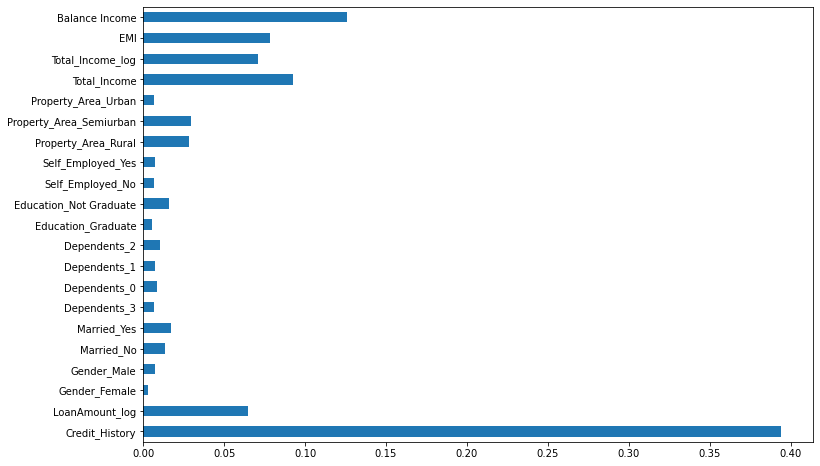

In [173]:
importances = pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(12,8))
plt.show()

We can see that Credit_History is the most important feature followed by Balance Income,Total Income, EMI. So feature engineering helped us in predicting our target variable

## XGBoost

In [175]:
from xgboost import XGBClassifier

In [176]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    model = XGBClassifier(n_estimators=50,max_depth=4)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)
    i+=1
pred_test = model.predict(test)
pred3 = model.predict_proba(test)[:,1]


1 of kfold 5
accuracy_score 0.7886178861788617

2 of kfold 5
accuracy_score 0.8292682926829268

3 of kfold 5
accuracy_score 0.7804878048780488

4 of kfold 5
accuracy_score 0.8048780487804879

5 of kfold 5
accuracy_score 0.7786885245901639


In [177]:
submission['Loan_Status']=pred_test
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('XGBoost.csv',index=False)